In [1]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.data import coins
from skimage.transform import warp
from matplotlib.patches import Rectangle
from skimage.transform import (
    warp_polar,
    resize,
    SimilarityTransform,
    warp,
)


a = np.arange(6).reshape(2, 3) + 1
print(a)
a = np.pad(a, ((1, 5), (10, 20)), mode='constant', constant_values=0)
print(a)

transform = SimilarityTransform(translation=(2, 1))
a = warp(a, transform.inverse, order=0)
print(a)

coords = [[0,0], [0,10], [10, 10], [10, 0]]
print(coords)
print(transform(coords))
print(transform.inverse.translation)

[[1 2 3]
 [4 5 6]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 5 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 5 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 

In [14]:
import numpy as np

# Creating two arrays
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Using @ operator
result_at = A @ B
print("Using @ operator:")
print(result_at)

# Using np.dot()
result_dot = np.dot(A, B)
print("\nUsing np.dot():")
print(result_dot)

result_dot2 = A.dot(B)
print("\nUsing dot():")
print(result_dot2)

Using @ operator:
[[19 22]
 [43 50]]

Using np.dot():
[[19 22]
 [43 50]]

Using dot():
[[19 22]
 [43 50]]


In [3]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import data, util, transform, feature, measure, filters, metrics


def match_locations(img0, img1, coords0, coords1, radius=5, sigma=3):
    """Match image locations using SSD minimization.

    Areas from `img0` are matched with areas from `img1`. These areas
    are defined as patches located around pixels with Gaussian
    weights.

    Parameters
    ----------
    img0, img1 : 2D array
        Input images.
    coords0 : (2, m) array_like
        Centers of the reference patches in `img0`.
    coords1 : (2, n) array_like
        Centers of the candidate patches in `img1`.
    radius : int
        Radius of the considered patches.
    sigma : float
        Standard deviation of the Gaussian kernel centered over the patches.

    Returns
    -------
    match_coords: (2, m) array
        The points in `coords1` that are the closest corresponding matches to
        those in `coords0` as determined by the (Gaussian weighted) sum of
        squared differences between patches surrounding each point.
    """
    y, x = np.mgrid[-radius : radius + 1, -radius : radius + 1]
    weights = np.exp(-0.5 * (x**2 + y**2) / sigma**2)
    weights /= 2 * np.pi * sigma * sigma

    match_list = []
    for r0, c0 in coords0:
        roi0 = img0[r0 - radius : r0 + radius + 1, c0 - radius : c0 + radius + 1]
        roi1_list = [
            img1[r1 - radius : r1 + radius + 1, c1 - radius : c1 + radius + 1]
            for r1, c1 in coords1
        ]
        # sum of squared differences
        ssd_list = [np.sum(weights * (roi0 - roi1) ** 2) for roi1 in roi1_list]
        match_list.append(coords1[np.argmin(ssd_list)])

    return np.array(match_list)

In [4]:
img = data.moon()
print(img.shape)

angle_list = [10, 5, 6, -2, 3, -4, -20]
center_list = [(4, 4), (10, 10), (5, 12), (11, 21), (21, 17), (43, 15), (80, 80)]

img_list = [
    transform.rotate(img, angle=a, center=c)[40:240, 50:350]
    for a, c in zip(angle_list, center_list)
]
ref_img = img_list[0].copy()

img_list = [
    util.random_noise(filters.gaussian(im, sigma=1.1), var=5e-4, rng=seed)
    for seed, im in enumerate(img_list)
]

psnr_ref = metrics.peak_signal_noise_ratio(ref_img, img_list[0])

(512, 512)


In [5]:
min_dist = 5
corner_list = [
    feature.corner_peaks(
        feature.corner_harris(img), threshold_rel=0.001, min_distance=min_dist
    )
    for img in img_list
]

In [6]:
img0 = img_list[0]
coords0 = corner_list[0]
matching_corners = [
    match_locations(img0, img1, coords0, coords1, min_dist)
    for img1, coords1 in zip(img_list, corner_list)
]

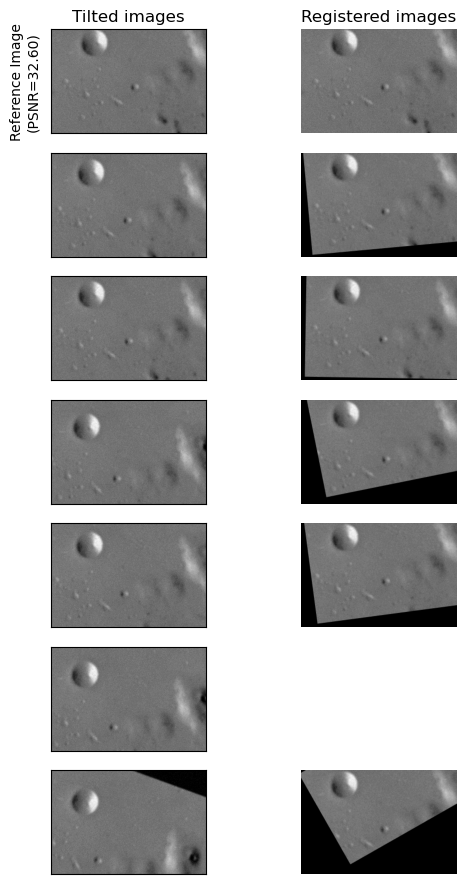

In [7]:
src = np.array(coords0)
trfm_list = [
    measure.ransac(
        (dst, src),
        transform.EuclideanTransform,
        min_samples=3,
        residual_threshold=2,
        max_trials=100,
    )[0]
    for dst in matching_corners
]

fig, ax_list = plt.subplots(7, 2, figsize=(6, 9), sharex=True, sharey=True)
for idx, (im, trfm, (ax0, ax1)) in enumerate(zip(img_list, trfm_list, ax_list)):
    ax0.imshow(im, cmap="gray", vmin=0, vmax=1)
    ax1.imshow(transform.warp(im, trfm), cmap="gray", vmin=0, vmax=1)

    if idx == 0:
        ax0.set_title("Tilted images")
        ax0.set_ylabel(f"Reference Image\n(PSNR={psnr_ref:.2f})")
        ax1.set_title("Registered images")

    ax0.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    ax1.set_axis_off()

fig.tight_layout()

In [8]:
margin = 50
height, width = img_list[0].shape
out_shape = height + 2 * margin, width + 2 * margin
glob_trfm = SimilarityTransform(translation=(-margin, -margin))

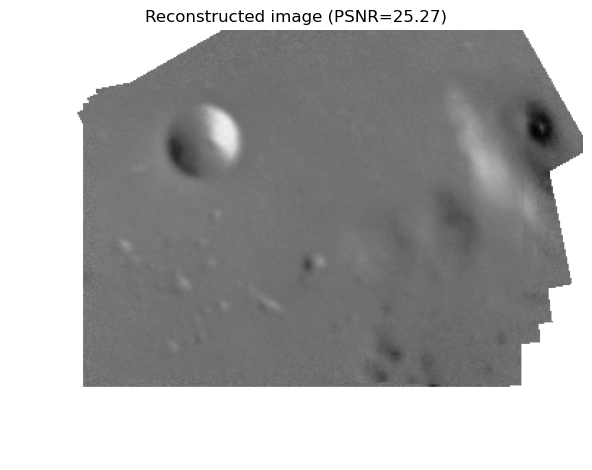

In [9]:
global_img_list = [
    transform.warp(
        img, glob_trfm + trfm, output_shape=out_shape, mode="constant", cval=np.nan
    )
    for img, trfm in zip(img_list, trfm_list)
]

all_nan_mask = np.all([np.isnan(img) for img in global_img_list], axis=0)
global_img_list[0][all_nan_mask] = 1.0

composite_img = np.nanmean(global_img_list, 0)
psnr_composite = metrics.peak_signal_noise_ratio(
    ref_img, composite_img[margin : margin + height, margin : margin + width]
)

fig, ax = plt.subplots(1, 1)

ax.imshow(composite_img, cmap="gray", vmin=0, vmax=1)
ax.set_axis_off()
ax.set_title(f"Reconstructed image (PSNR={psnr_composite:.2f})")
fig.tight_layout()

plt.show()

min_x: -5.879040384401203e-14, max_x: 300.00000000000006, min_y: -2.842170943040401e-14, max_y: 200.00000000000003
left: 0, right: 1, top: 0, bottom: 1
[[ 1.00000000e+00 -3.92520892e-17  2.84217094e-14]
 [ 9.73492492e-18  1.00000000e+00  5.68434189e-14]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
min_x: 3.0460424255326757, max_x: 320.1158884443497, min_y: -31.625024792730457, max_y: 195.03225227160604
left: 0, right: 20, top: 31, bottom: 0
[[  0.99578997   0.09166428 -27.17084148]
 [ -0.09166428   0.99578997  -3.41140159]
 [  0.           0.           1.        ]]
[31.  0.]


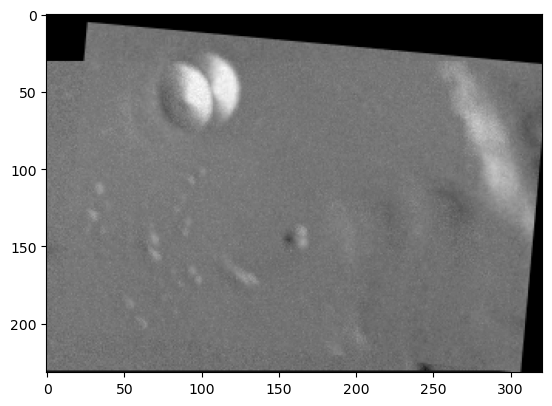

In [13]:
# glob_trfm: origin of reference to origin of global image
glob_trfm = SimilarityTransform()
# trfm: from image b to reference


combined = np.zeros(img_list[0].shape)
count = 2
for img, trfm in zip(img_list[0:count], trfm_list[0:count]):
    corners = (glob_trfm + trfm)([[0, 0], [0, img.shape[1]], [img.shape[0], img.shape[1]], [img.shape[0], 0]])
    # corners = (glob_trfm.inverse)(corners)
    # plt.plot(corners[:, 1], corners[:, 0], 'ro')
    max_x = np.max(corners[:, 1])
    max_y = np.max(corners[:, 0])
    min_x = np.min(corners[:, 1])
    min_y = np.min(corners[:, 0])
    left = int(np.abs(min_x) if min_x < 0 else 0)
    right = int(max_x - (combined.shape[1] - 1) if max_x >= combined.shape[1] else 0)
    top = int(np.abs(min_y) if min_y < 0 else 0)
    bottom = int(max_y - (combined.shape[0] - 1) if max_y >= combined.shape[0] else 0)
    print(f"min_x: {min_x}, max_x: {max_x}, min_y: {min_y}, max_y: {max_y}")
    print(f"left: {left}, right: {right}, top: {top}, bottom: {bottom}")
    
    combined = np.pad(combined, ((top, bottom), (left, right)), mode='constant', constant_values=0)
    
    glob_trfm += SimilarityTransform(translation=(-top, -left))
    
    # print(corners)
    # plt.plot(corners[:, 1], corners[:, 0], 'ro')
    
    img = transform.warp(
        img, (glob_trfm + trfm).inverse, output_shape=combined.shape, mode="constant", cval=0
    )
    # combined = img    
    combined = np.maximum(combined, img)
    print((glob_trfm + trfm).inverse.params)




# origin = glob_trfm.inverse([[0, 0]])
# plt.plot(origin[0][1], origin[0][0], 'bo')


print(glob_trfm.translation)
plt.imshow(combined, cmap='gray')
plt.show()

[[10. 10.]
 [10. 12.]
 [12. 12.]
 [12. 10.]]
0
[[-10.   0.]
 [-10.   2.]
 [ -8.   2.]
 [ -8.   0.]]
min_x: 0.0, max_x: 2.0, min_y: -10.0, max_y: -8.0
left: 0, right: 0, top: 10, bottom: 0
[[0. 0.]
 [0. 2.]
 [2. 2.]
 [2. 0.]]

1
[[2. 1.]
 [2. 3.]
 [4. 3.]
 [4. 1.]]
min_x: 1.0, max_x: 3.0, min_y: 2.0, max_y: 4.0
[[2. 1.]
 [2. 3.]
 [4. 3.]
 [4. 1.]]

2
[[4. 2.]
 [4. 4.]
 [6. 4.]
 [6. 2.]]
min_x: 2.0, max_x: 4.0, min_y: 4.0, max_y: 6.0
[[4. 2.]
 [4. 4.]
 [6. 4.]
 [6. 2.]]

3
[[6. 3.]
 [6. 5.]
 [8. 5.]
 [8. 3.]]
min_x: 3.0, max_x: 5.0, min_y: 6.0, max_y: 8.0
[[6. 3.]
 [6. 5.]
 [8. 5.]
 [8. 3.]]

4
[[ 8.  4.]
 [ 8.  6.]
 [10.  6.]
 [10.  4.]]
min_x: 4.0, max_x: 6.0, min_y: 8.0, max_y: 10.0
[[ 8.  4.]
 [ 8.  6.]
 [10.  6.]
 [10.  4.]]

5
[[10.  5.]
 [10.  7.]
 [12.  7.]
 [12.  5.]]
min_x: 5.0, max_x: 7.0, min_y: 10.0, max_y: 12.0
[[10.  5.]
 [10.  7.]
 [12.  7.]
 [12.  5.]]

6
[[12.  6.]
 [12.  8.]
 [14.  8.]
 [14.  6.]]
min_x: 6.0, max_x: 8.0, min_y: 12.0, max_y: 14.0
[[12.  6.]
 [12.  8.]
 

[]

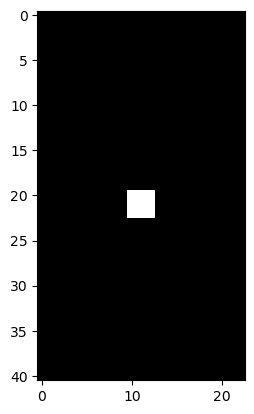

In [11]:
glob_trfm = SimilarityTransform(translation=(10, 10))
transforms = [SimilarityTransform(translation=(i*2, i)) for i in range(-10, 10)]
print(glob_trfm([[0, 0], [0, 2], [2, 2], [2, 0]]))


data = []
source = np.pad(np.ones(9).reshape(3, 3), 10, mode='constant', constant_values=0)
i = 0
pad_left = 10
pad_right = 10
pad_top = 10
pad_bottom = 10

for t in transforms:
    print(i)
    img = source.copy()
    # order (y, x)
    corners = (t + glob_trfm)([[0, 0], [0, 2], [2, 2], [2, 0]])
    print(corners)

    max_x = np.max(corners[:, 1])
    max_y = np.max(corners[:, 0])
    min_x = np.min(corners[:, 1])
    min_y = np.min(corners[:, 0])
    print(f"min_x: {min_x}, max_x: {max_x}, min_y: {min_y}, max_y: {max_y}")
    left = int(np.abs(min_x) if min_x < 0 else 0)
    right = int(max_x - (source.shape[1] - 1) if max_x >= source.shape[1] else 0)
    top = int(np.abs(min_y) if min_y < 0 else 0)
    bottom = int(max_y - (source.shape[0] - 1) if max_y >= source.shape[0] else 0)
    
    pad_left += left
    pad_right += right
    pad_top += top
    pad_bottom += bottom


    if left > 0 or right > 0 or top > 0 or bottom > 0:
        img = np.pad(img, ((top, bottom), (left, right)), mode='constant', constant_values=0)
        source = img
        glob_trfm += SimilarityTransform(translation=(top, left))
        print(f"left: {left}, right: {right}, top: {top}, bottom: {bottom}")

    corners = (t + glob_trfm)([[0, 0], [0, 2], [2, 2], [2, 0]])
    print(corners)
    data.append(transform.warp(img, (t + glob_trfm).inverse, output_shape=source.shape, mode='constant', cval=0))
    i += 1
    print()



print(pad_left, pad_right, pad_top, pad_bottom)
print(source.shape)

plt.imshow(source, cmap='gray')
plt.plot()


In [139]:
import cv2

def gridd(X,Y):
    gridd1=(X>0).astype(int)
    gridd2=(Y>0).astype(int)
    gridd3=gridd1+gridd2
    asd=(gridd3==0).astype(int)
    res=gridd3+asd
    return res

def image_warp(im1,im2,H):
    # Takes 2 images and their homography matrix and stitches them
    # First canvas is calculated
    w1,h1=im2.shape
    w2,h2=im1.shape
    
    box1 = np.float32([ [0,0], [0,w1], [h1, w1], [h1,0] ]).reshape(-1,1,2)
    box2_temp = np.float32([ [0,0], [0,w2], [h2, w2], [h2,0] ]).reshape(-1,1,2)
    box2 = cv2.perspectiveTransform(box2_temp, H)
    
    canvas_dims = np.concatenate( (box1, box2), axis = 0)
    
    [x_min, y_min] = np.int32(canvas_dims.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(canvas_dims.max(axis=0).ravel() + 0.5)
    
    T = np.array([[1, 0, -x_min], [0, 1, -y_min],[0,0,1]]) 
    
    stitched = cv2.warpPerspective(im1, T.dot(H),(x_max-x_min, y_max-y_min))
    
    A=(im2).astype(float)+(stitched[-y_min:w1-y_min,-x_min:h1-x_min]).astype(float)
    B=gridd(stitched[-y_min:w1-y_min,-x_min:h1-x_min],im2)
    stitched[-y_min:w1-y_min,-x_min:h1-x_min] = np.divide(A,B)

    return stitched

0.003159046173095703


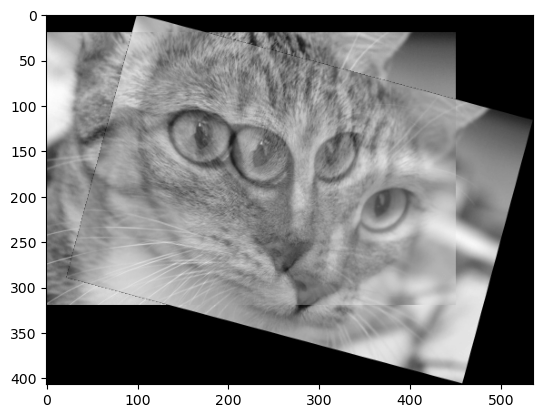

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time

from skimage import data
from skimage import transform
from skimage import img_as_float

tform = transform.EuclideanTransform(rotation=np.pi / 12.0, translation=(100, -20))

img = img_as_float(data.chelsea())
img = np.mean(img, axis=2)
combined_img = img.copy()

t = time.time()
stitched = image_warp(img, combined_img, tform.params)
print(time.time() - t)
plt.imshow(stitched, cmap='gray')
plt.show()

img (300, 451)
source_corners [[  0   0]
 [451   0]
 [  0 300]
 [451 300]]
corners [[100.         -20.        ]
 [535.63254766  96.72738934]
 [ 22.35428647 269.77774789]
 [457.98683413 386.50513723]]
min_x: 22.354286469243775, max_x: 535.6325476563698, min_y: -20.0, max_y: 386.50513722795733
left: 0, right: 83, top: 20, bottom: 85
[[ 94.8236191   -0.68148347]
 [530.45616675 116.04590587]
 [ 17.17790557 289.09626441]
 [452.81045322 405.82365375]]
(405, 534)


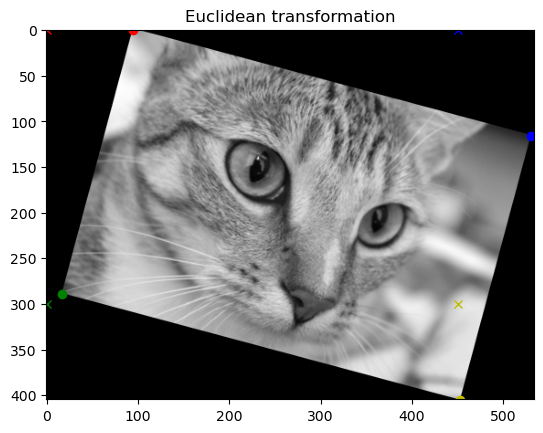

In [140]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage import img_as_float

tform = transform.EuclideanTransform(rotation=np.pi / 12.0, translation=(100, -20))

global_trfm = transform.SimilarityTransform()

img = img_as_float(data.chelsea())
img = np.mean(img, axis=2)
combined_img = np.zeros(img.shape)

print("img", img.shape)
# img = np.pad(img, 150, mode='constant', constant_values=0)
# x, y??
source_corners = np.array([[0, 0], [img.shape[1], 0], [0, img.shape[0]], [img.shape[1], img.shape[0]]])
print("source_corners", source_corners)
corners = tform(source_corners)

print("corners", corners)

max_x = np.max(corners[:, 0])
max_y = np.max(corners[:, 1])
min_x = np.min(corners[:, 0])
min_y = np.min(corners[:, 1])

print(f"min_x: {min_x}, max_x: {max_x}, min_y: {min_y}, max_y: {max_y}")

left = int(np.abs(min_x)) if min_x < 0 else 0
right = int(max_x - img.shape[1] - 1) if max_x >= img.shape[1] else 0
top = int(np.abs(min_y)) if min_y < 0 else 0
bottom = int(max_y - img.shape[0] - 1) if max_y >= img.shape[0] else 0

print(f"left: {left}, right: {right}, top: {top}, bottom: {bottom}")

global_trfm += transform.SimilarityTransform(translation=(-left, -top)) 

combined_img = np.pad(combined_img, ((top, bottom), (left, right)), mode='constant', constant_values=0)

corners = source_corners
# corners = (tform)(corners)
# corners = (global_trfm.inverse(corners))
corners = (global_trfm.inverse + tform)(corners)
print(corners)

tf_img = img
tf_img = transform.warp(tf_img, tform.inverse + global_trfm, output_shape=combined_img.shape, mode='constant', cval=0)
# tf_img = transform.warp(tf_img, global_trfm.inverse, output_shape=combined_img.shape, mode='constant', cval=0)
print(tf_img.shape)
fig, ax = plt.subplots()

ax.plot(corners[0, 0], corners[0, 1], 'ro')
ax.plot(corners[1, 0], corners[1, 1], 'bo')
ax.plot(corners[2, 0], corners[2, 1], 'go')
ax.plot(corners[3, 0], corners[3, 1], 'yo')

ax.plot(source_corners[0, 0], source_corners[0, 1], 'rx')
ax.plot(source_corners[1, 0], source_corners[1, 1], 'bx')
ax.plot(source_corners[2, 0], source_corners[2, 1], 'gx')
ax.plot(source_corners[3, 0], source_corners[3, 1], 'yx')
ax.imshow(tf_img, cmap='gray')
_ = ax.set_title('Euclidean transformation')

In [152]:
np.nan * 2

nan